<h1>AIML CA1 Regression</h1>

<h5>Name : Rejey Ezekiel Jeyakumar
</br>Class : DAAA/FT/1B/01
</br>Admin No. : 2348935</h5>

<hr>

<h5><b>The objectives of this assignment are to:</b></h5>
<ol>
<li>Explore the given dataset,<i> credit_dataset.csv</i>, and try to gain insights from it.</li>
<li>Build a classification model to predict whether a customer will default payment in the next month, in order to better manage risk for a bank.</li>
</ol>

<h5><b>Background Info:</b></h5>
A bank has collected data on it's customers, such as their age, gender, level of education, credit limit, payment and bill history. From this data, the bank would like to predict if a customer would default on their bill in the upcoming month, in a attempt to mitigate risk taken. If a customer is predicted to default on their bill, the bank can take action to mitigate the risk, such as reducing the credit limit of the customer, or contacting the customer to remind them to pay their bill.

<h5><b>Additional Info:</b></h5>
A default is a missed or multiple missed payments on money that you have borrowed. An example of a default would be not paying your credit card bill or your monthly mortgage payment. (Investopedia, 2023)

Potential Reasons for Defaulting:
<ol>
<li>Customer does not have high income, does not have money to repay</li>
</ol>

</br>
<hr>
<h3>Importing Libraries</h3>
<hr></hr>

In [103]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SKLEARN Libraries
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, RobustScaler
from sklearn.impute import KNNImputer

# Model Selection
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    GridSearchCV,
    learning_curve,
    StratifiedKFold,
)
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, accuracy_score, f1_score

# Models
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier

# IMBLEARN
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Pickle
import pickle

<h3>1. Loading Dataset</h3>

In [104]:
#Loading Dataset
df = pd.read_csv('CA1-Regression-Dataset.csv')

#View Dataset
df.head()

,ID,Age,Gender,BMI,Smoker,Region,Cost ($)
0,1,19,female,27.900,yes,southwest,16884.92400
1,2,18,male,33.770,no,southeast,1725.55230
2,3,28,male,33.000,no,southeast,4449.46200
3,4,33,male,22.705,no,northwest,21984.47061
4,5,32,male,28.880,no,northwest,3866.85520


<hr></hr>
<h3>Exploratory Data Analysis</h3>
<hr></hr>

<li><b>ph:</b> lol</li>


1. Seeing the outline of the dataset.
<hr></hr>

In [105]:
#View the size of the dataset and the columns.
print(f'Shape of the Column: {df.shape}')

Shape of the Column: (1338, 7)


In [106]:
#View the features of the dataset
print(f'Columns of Dataset: {df.columns}')

Columns of Dataset: Index(['ID', 'Age', 'Gender', 'BMI', 'Smoker', 'Region', 'Cost ($)'], dtype='object')


In [107]:
# Getting info of the dataset
print('The Information about the Dataset')
df.info()

The Information about the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   Age       1338 non-null   int64  
 2   Gender    1338 non-null   object 
 3   BMI       1338 non-null   float64
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Cost ($)  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


From this we can see that we have 3 objects inside our dataset. 

In [108]:
#Viewing the count, mean , standard deviation and many more key information.
df.describe()

,ID,Age,BMI,Cost ($)
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,13270.422265
std,386.391641,14.049960,6.098187,12110.011237
min,1.000000,18.000000,15.960000,1121.873900
25%,335.250000,27.000000,26.296250,4740.287150
50%,669.500000,39.000000,30.400000,9382.033000
75%,1003.750000,51.000000,34.693750,16639.912515
max,1338.000000,64.000000,53.130000,63770.428010


In [109]:
df = df.drop(["ID"], axis=1)
df.head()

,Age,Gender,BMI,Smoker,Region,Cost ($)
0,19,female,27.900,yes,southwest,16884.92400
1,18,male,33.770,no,southeast,1725.55230
2,28,male,33.000,no,southeast,4449.46200
3,33,male,22.705,no,northwest,21984.47061
4,32,male,28.880,no,northwest,3866.85520


Our Target for this dataset is Cost ($)

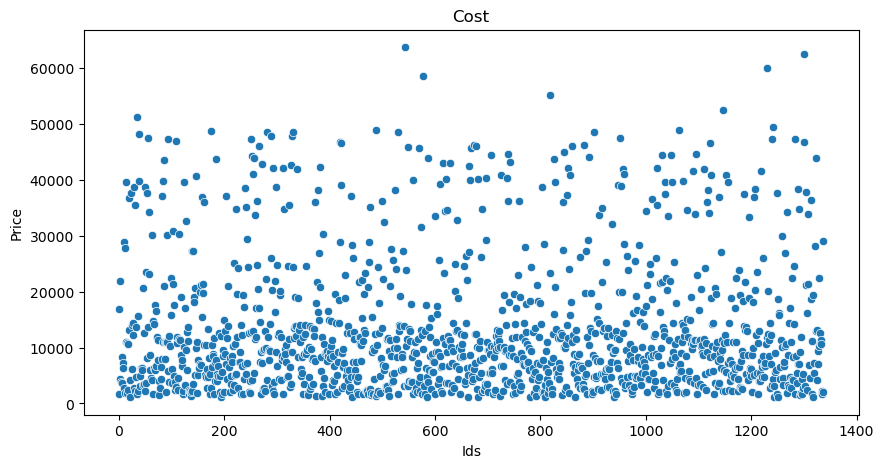

In [110]:
plt.figure(figsize=(10,5))
plt.title('Cost')
plt.xlabel('Ids')
plt.ylabel('Price')
sns.scatterplot(df['Cost ($)'])
plt.show()

<b>Analysis after viewing the outline of the dataset</b>
<li>The shape of the dataset is (1338, 7) showing that there are 1338 data points, and 7 Columns.In the 7 Columns there are 6 Features and 1 Target Variable being Price.</li>

In [111]:
#from this we can see the total number of missing data
print(f'Missing Values in dataset (Amount):\n{pd.isnull(df).sum()}\n')
print(f"Total Missing Values: {(pd.isnull(df).sum()).sum()}")

Missing Values in dataset (Amount):
Age         0
Gender      0
BMI         0
Smoker      0
Region      0
Cost ($)    0
dtype: int64

Total Missing Values: 0


We can see that there is no missing data.

<h4>Univariate Analysis</h4>

We will begin with a univariate analysis, analysing the distribution of each variable.

<h5>Distribution of numerical features</h5>

We will plot and see the distribution of the different numerical variables and how it relates to Price. To do this, we have a function to plot a distribution plot.
<hr></hr>

In [112]:
# Function to plot a bar chart of a numerical feature against the price

def plot_barplot(df, col):
    
    # Figure size
    plt.figure(figsize=(12, 7))
    
    # Bar plot
    sns.barplot(data=df, x=col, y='Cost ($)')
    
    # Title
    plt.title(f'Barplot of {col} vs Cost ($)')
    
    # Show plot
    plt.show()

In [113]:
# Function to plot a regression plot of a numerical feature against the price

def plot_regplot(df, col):
    
    # Figure size
    plt.figure(figsize=(12, 7))
    
    # Regression plot
    sns.regplot(data=df, x=col, y='Cost ($)')
    
    # Title
    plt.title(f'Scatterplot of {col} vs Cost ($)')
    
    # Show plot
    plt.show()

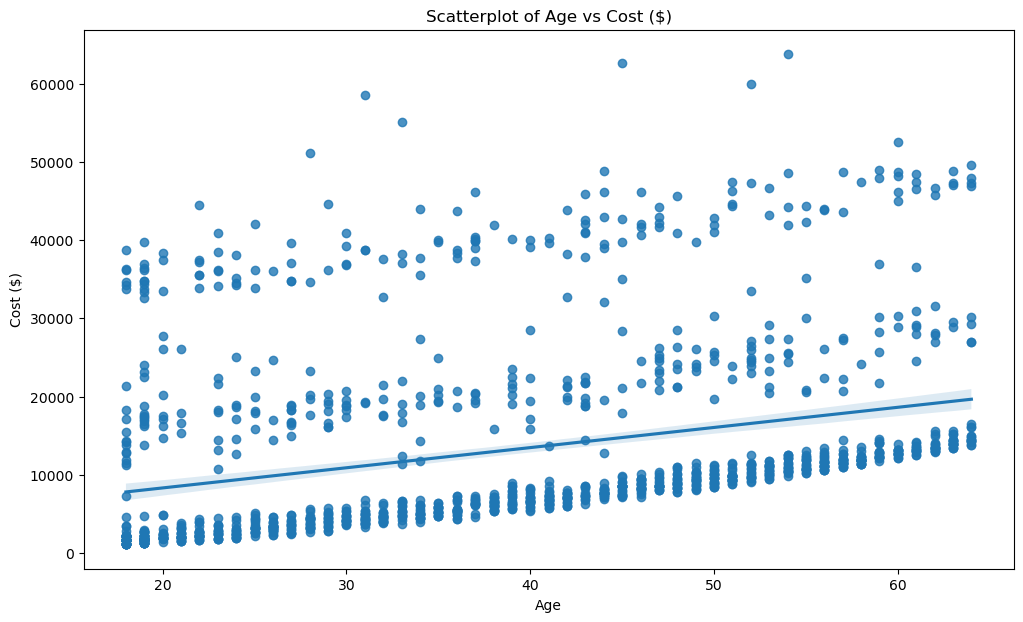

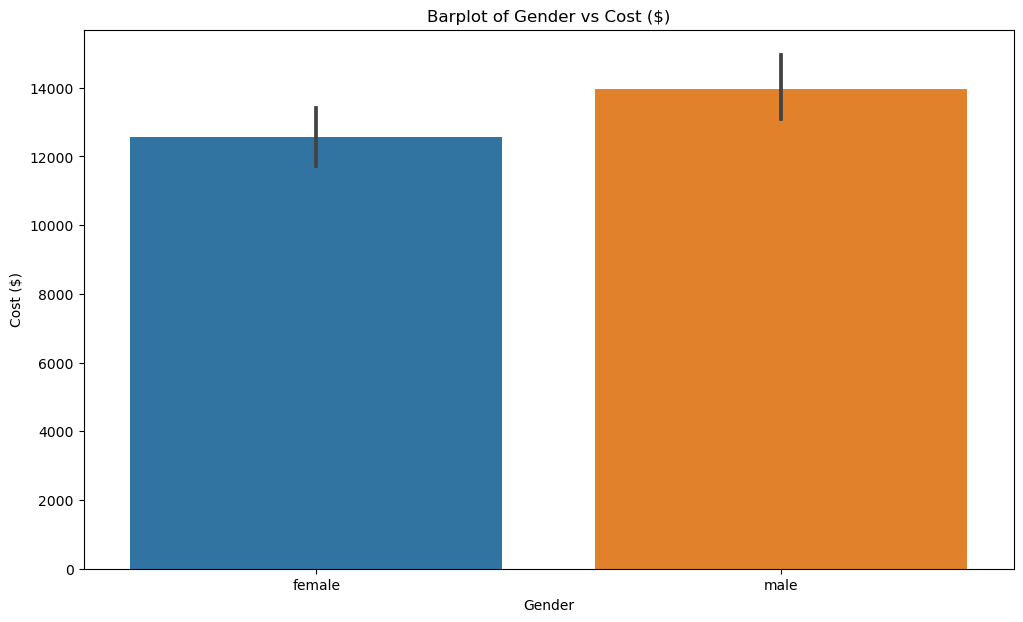

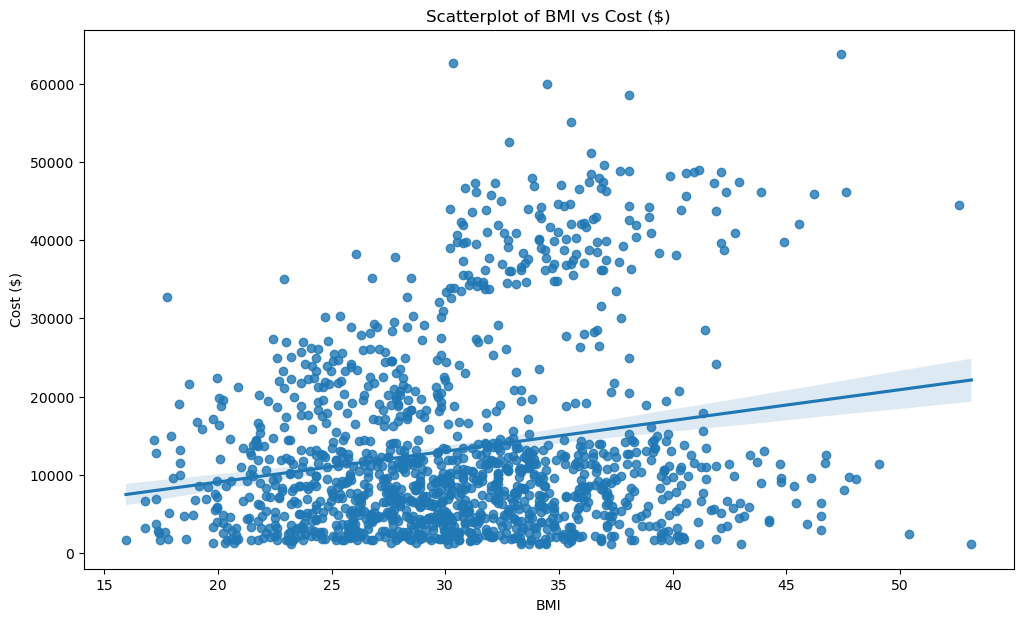

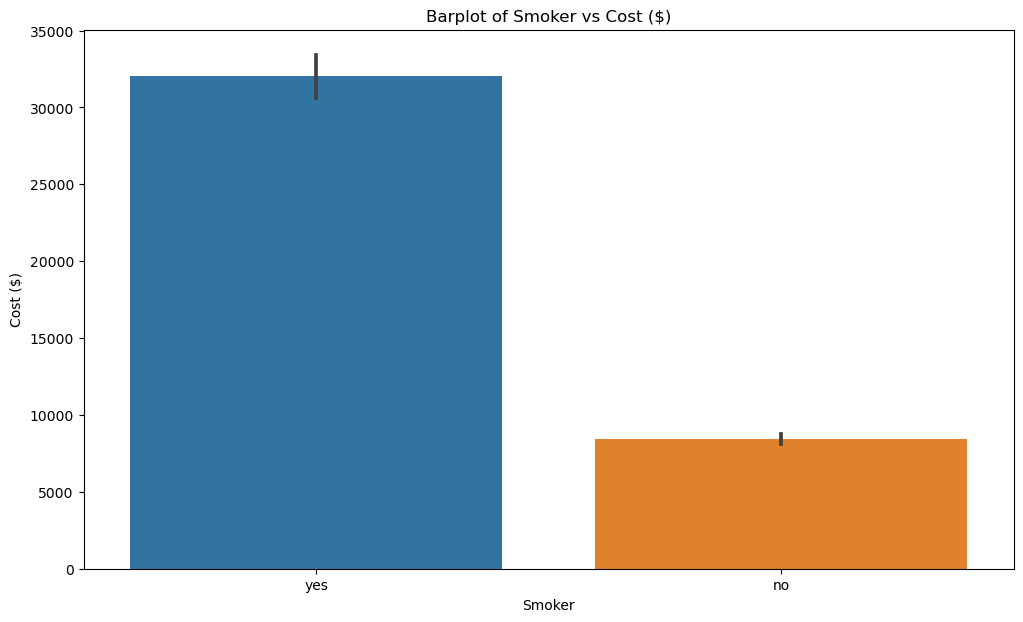

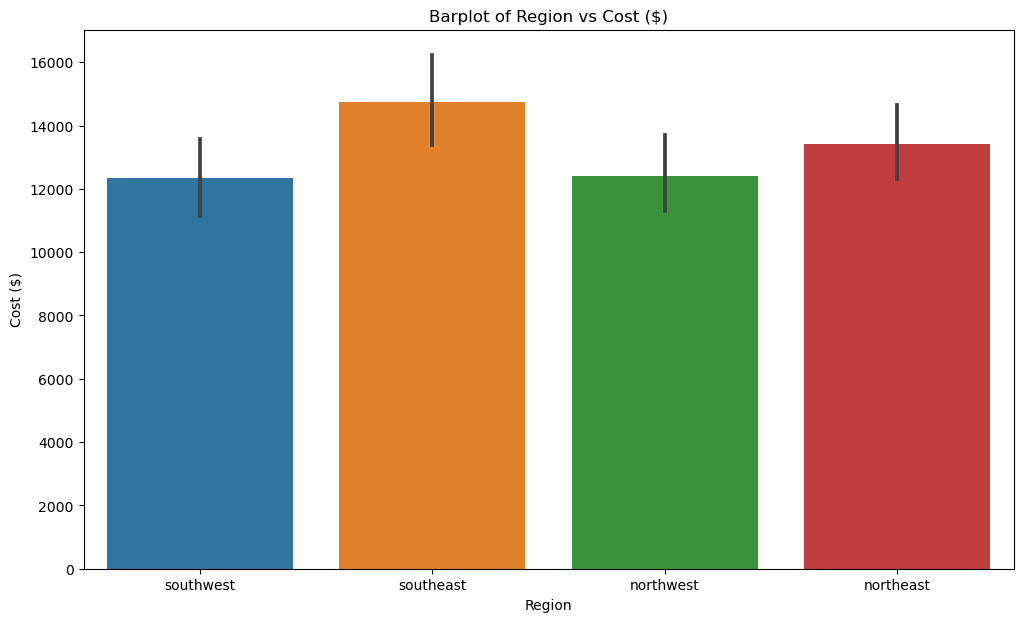

In [114]:
# Iterate through columns of the DataFrame
for col in df.columns[0:5]:
    # Check if the column is numerical
    if pd.api.types.is_numeric_dtype(df[col]):
        plot_regplot(df, col)
    else:
        plot_barplot(df, col)

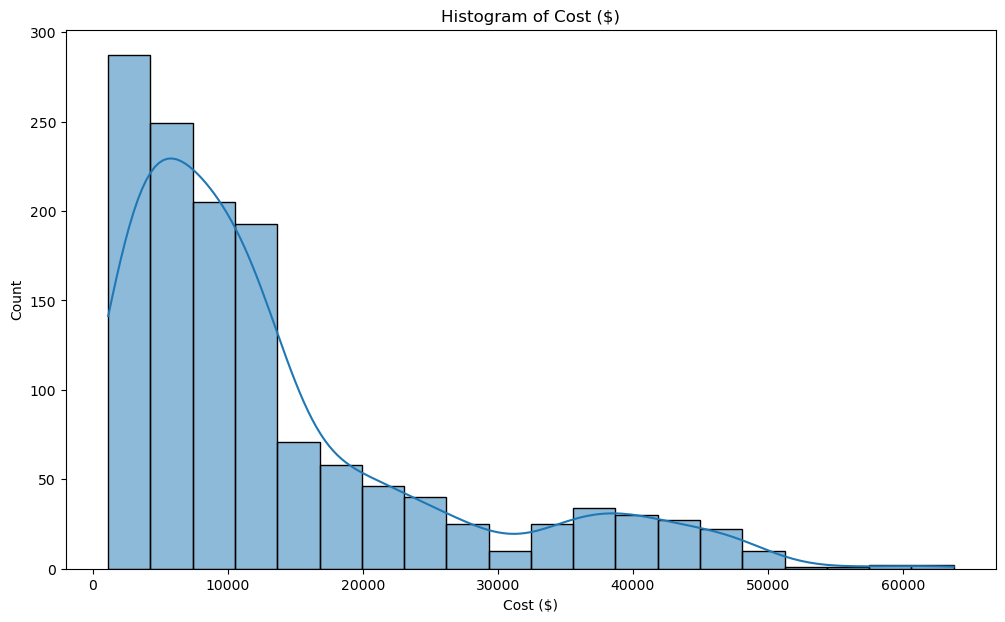

In [115]:
# Histplot of price
plt.figure(figsize=(12, 7))
sns.histplot(data=df, x='Cost ($)', kde=True, bins=20)
plt.title('Histogram of Cost ($)')
plt.show()


<h5>Bivariate Analysis</h5>

We will now analyse the relationships between the different variables.

<h5>Cramér's V Correlations</h5>

Cramér's V is an association measure for categorical variables. The coefficient ranges from 0 to 1, with 0 indicating independence and 1 indicating perfect association. We use this over Pearson's correlation coefficient as Pearson's correlation coefficient is only applicable for numerical variables, while we have a large amount categorical variables in our dataset.
   
The formula for calculating Cramér's V correlation coefficient is:

$$V = \sqrt{\frac{\chi^2}{n \cdot \min(k-1, r-1)}}$$

In [116]:
# Calculating the correlation
import scipy.stats as ss  


def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

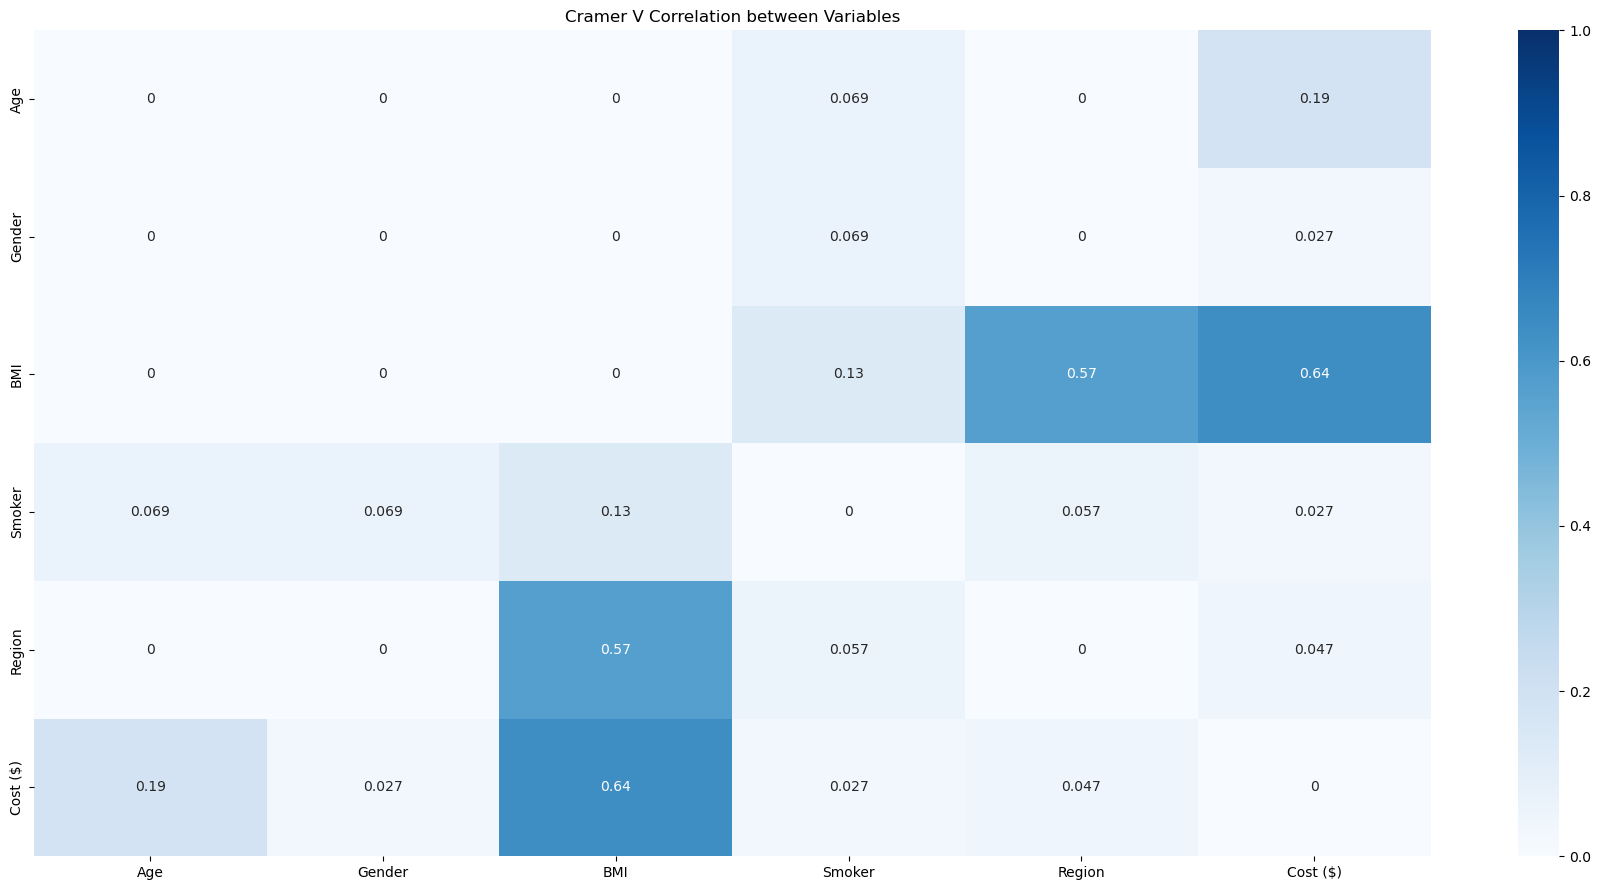

In [120]:
# Get all the columns in the dataset
import itertools
cols = list(df.columns)

# Generate empty correlation matrix
corrM = np.zeros((len(cols), len(cols)))

# Calculate the correlation matrix using the cramers_corrected_stat function
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(df[col1], df[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

# Generating heatmap
corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(18, 9), tight_layout=True)
ax = sns.heatmap(corr, annot=True, ax=ax, vmin=0, vmax=1, cmap="Blues")
ax.set_title("Cramer V Correlation between Variables")
plt.show()